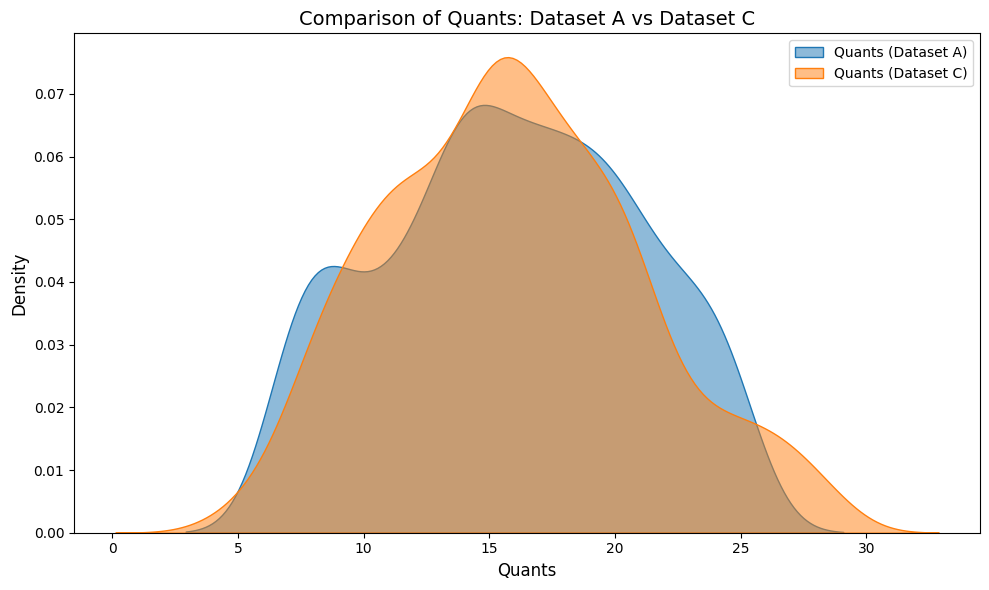

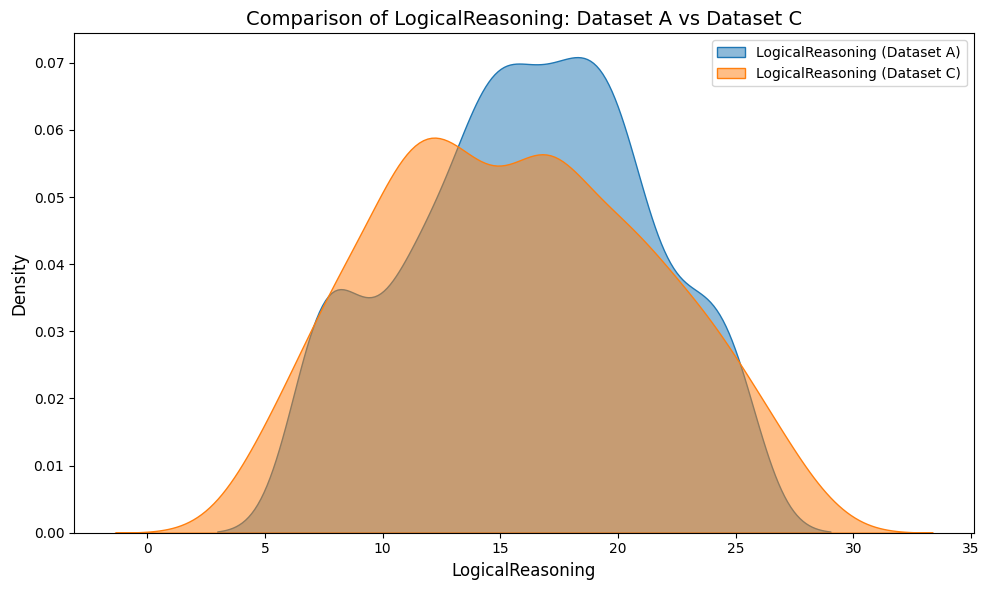

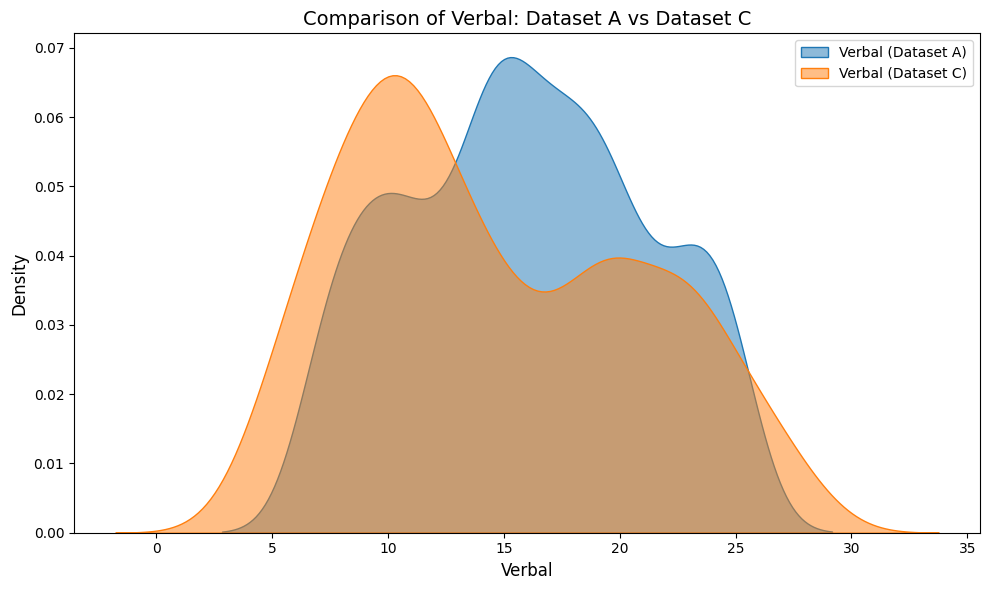

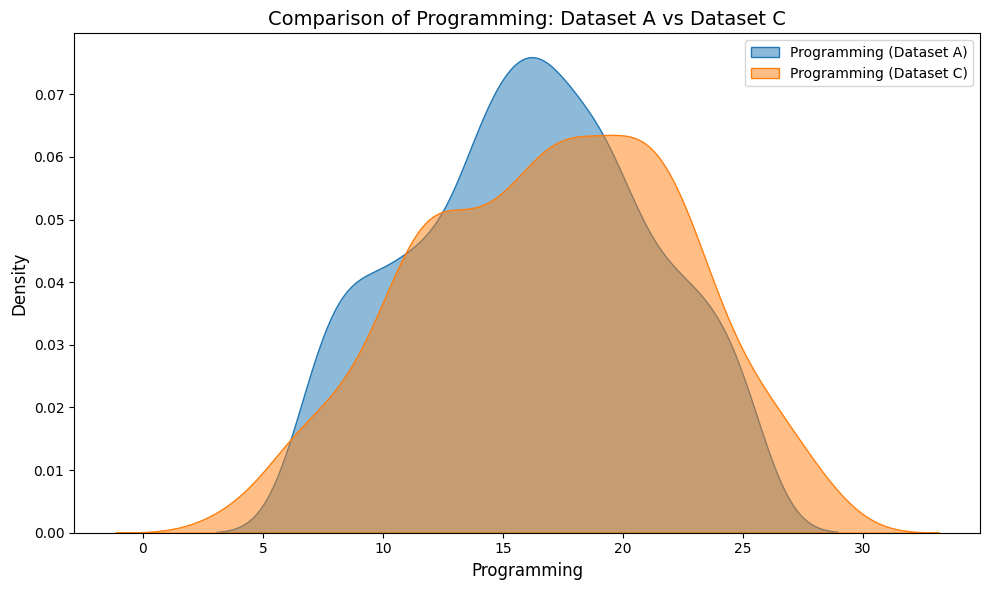

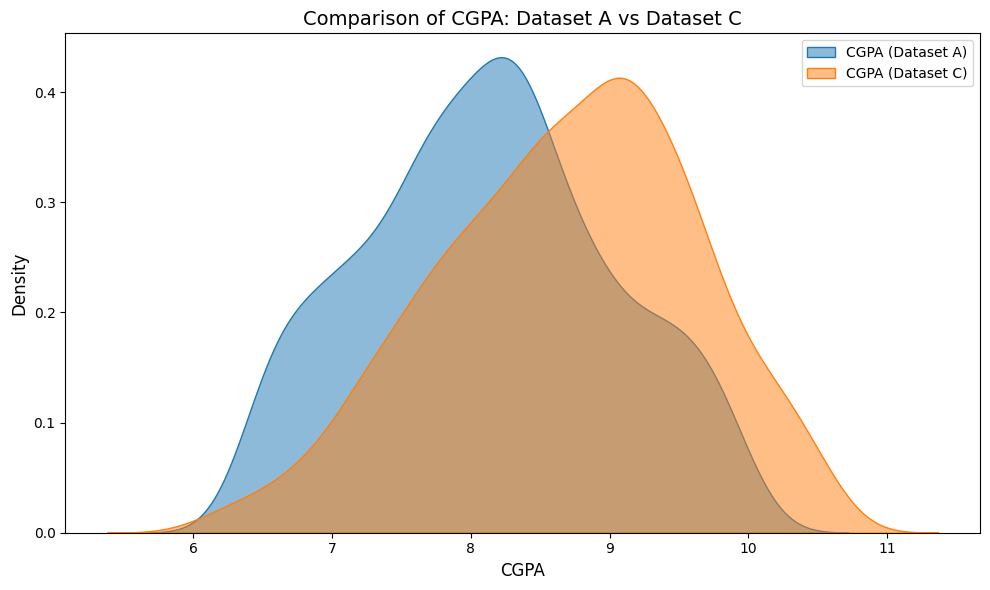

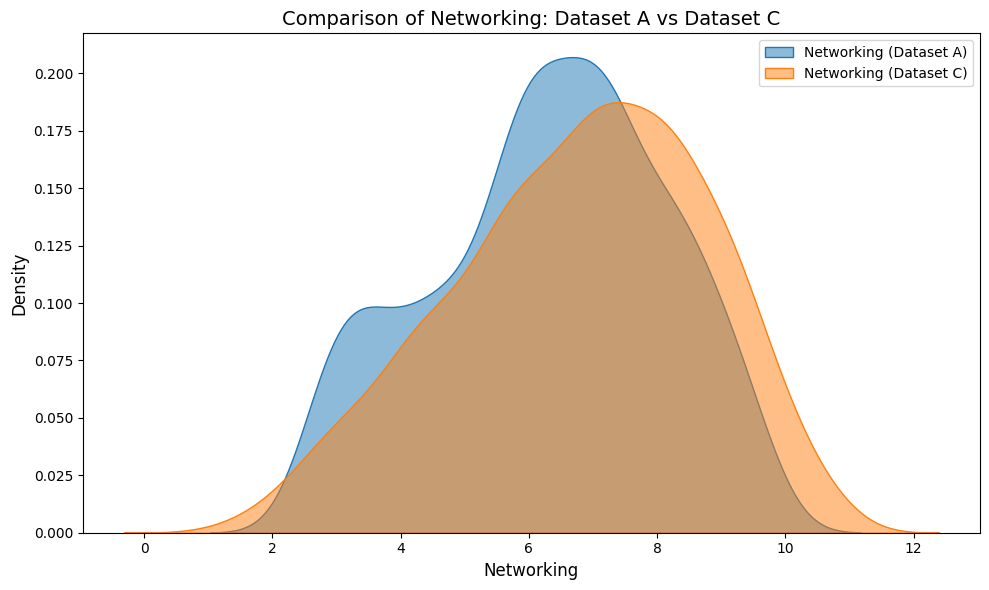

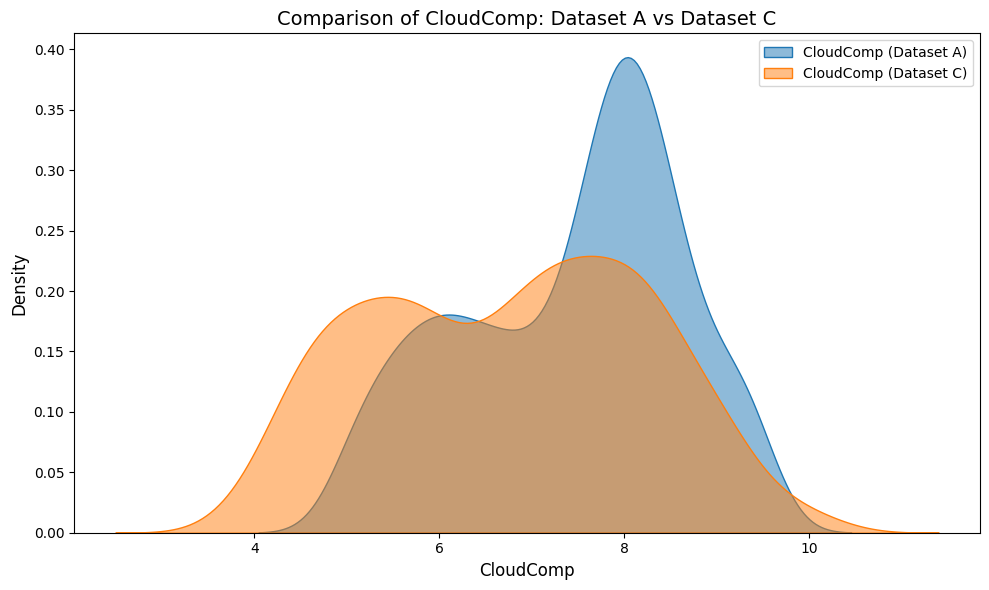

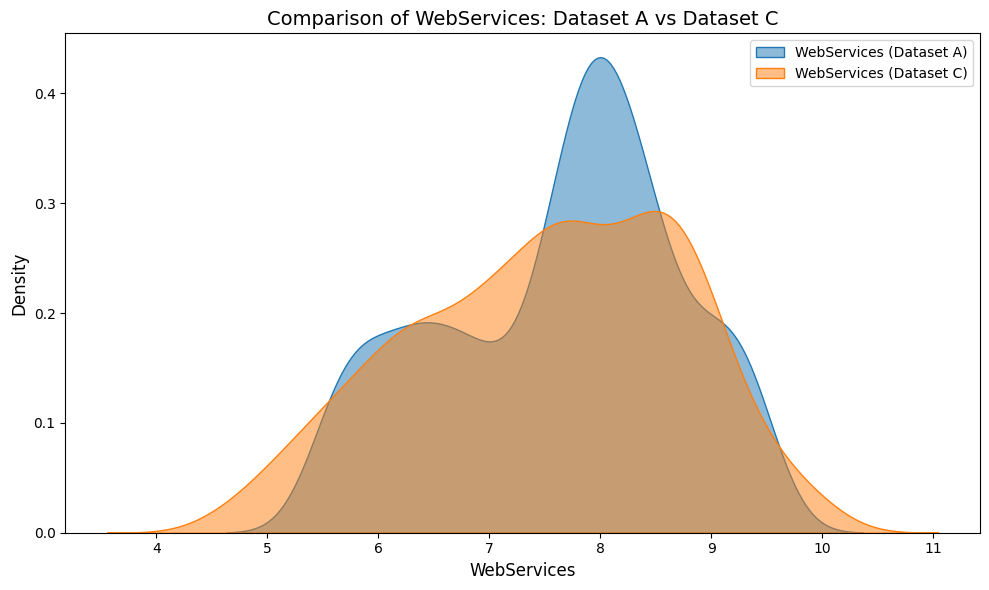

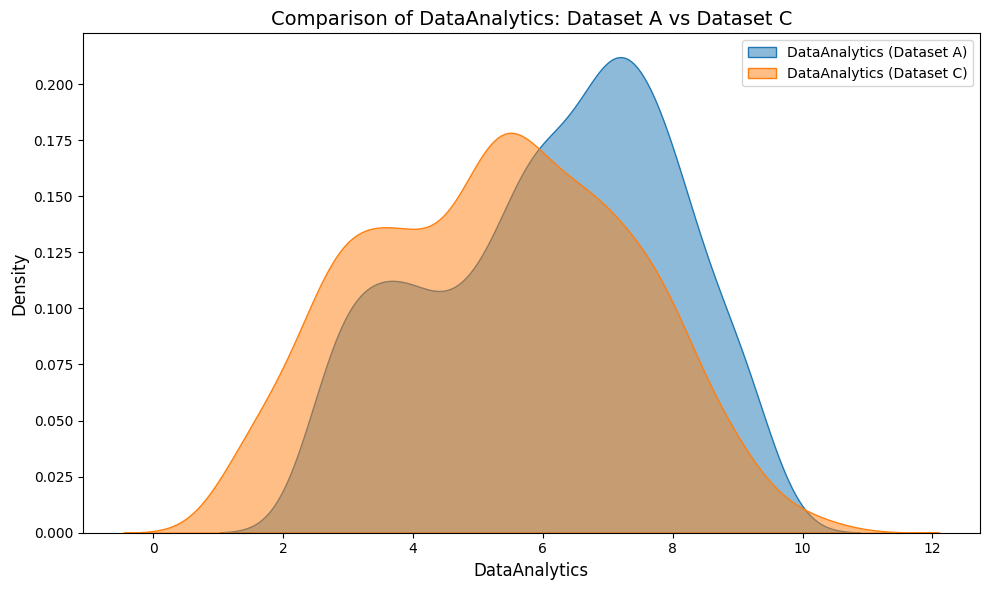

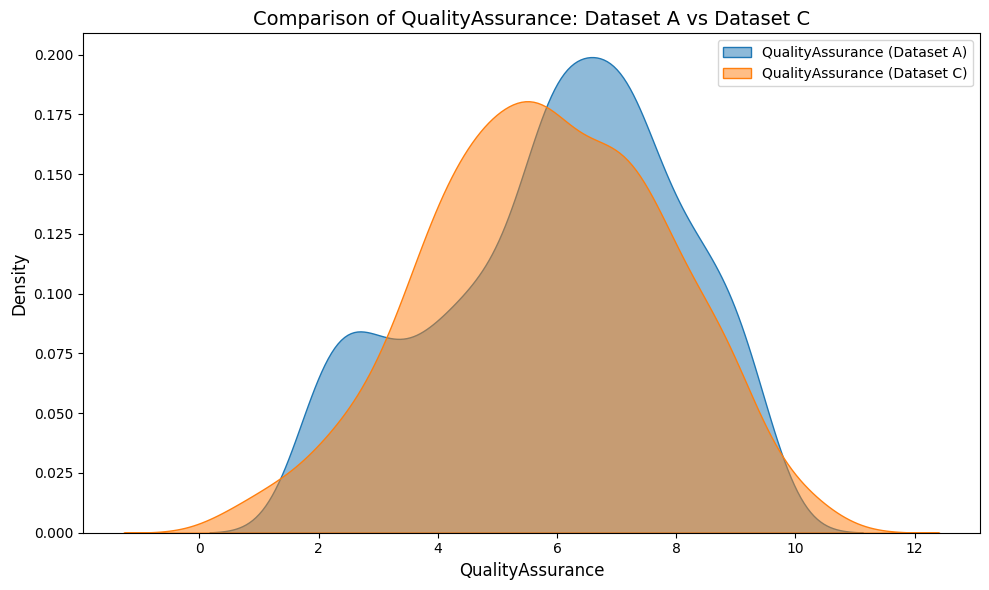

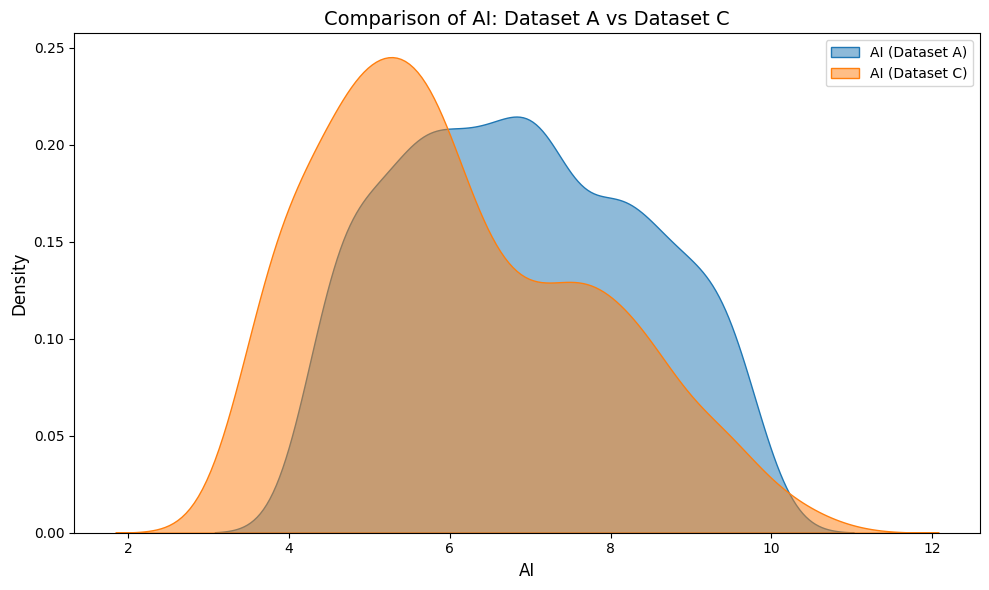

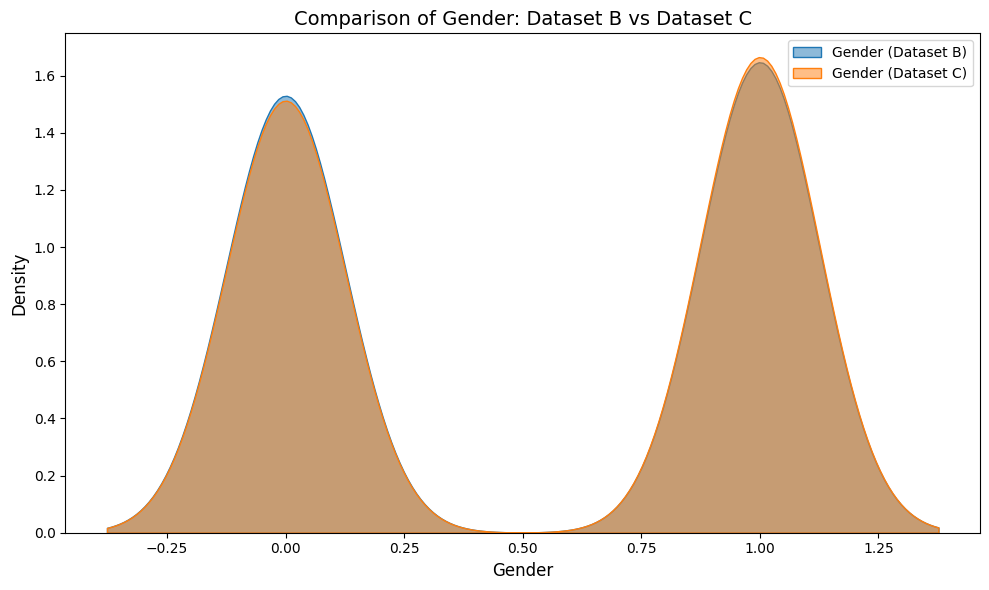

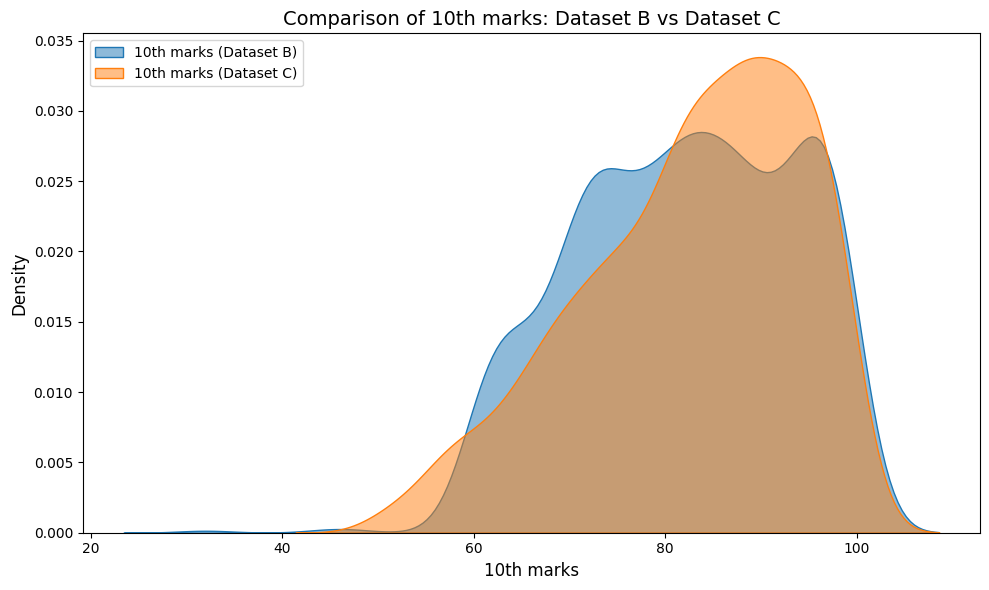

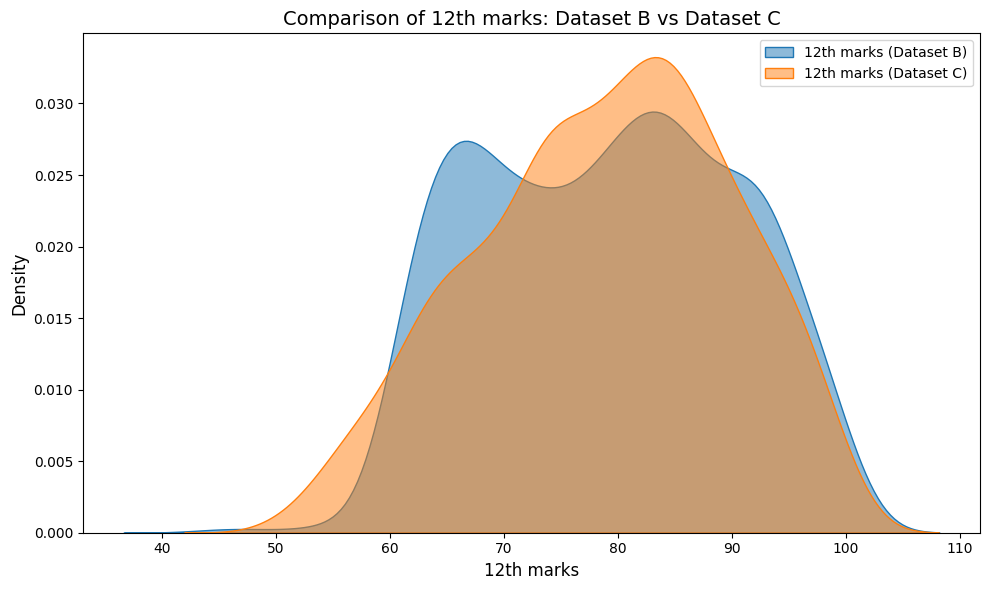

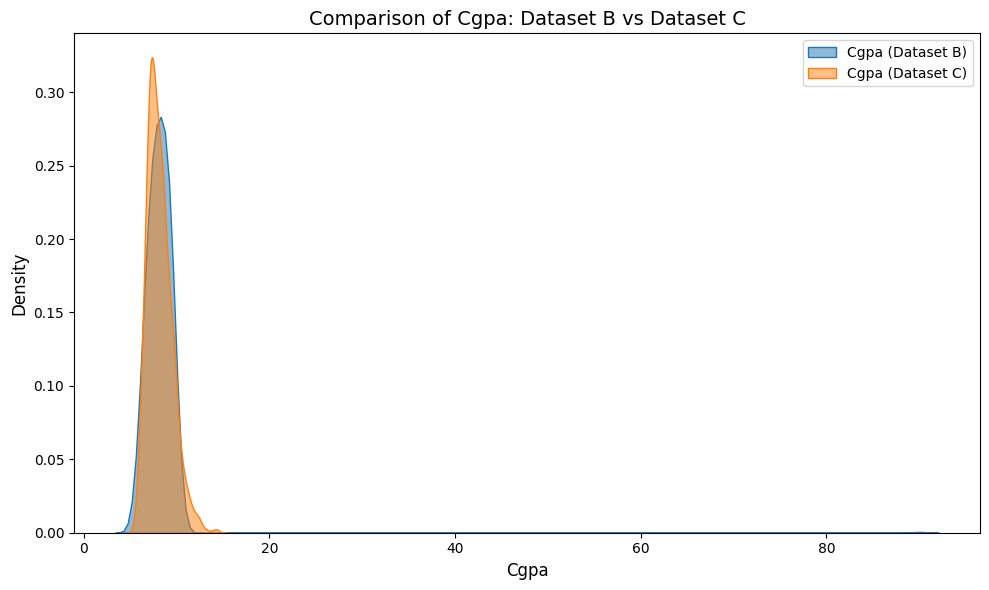

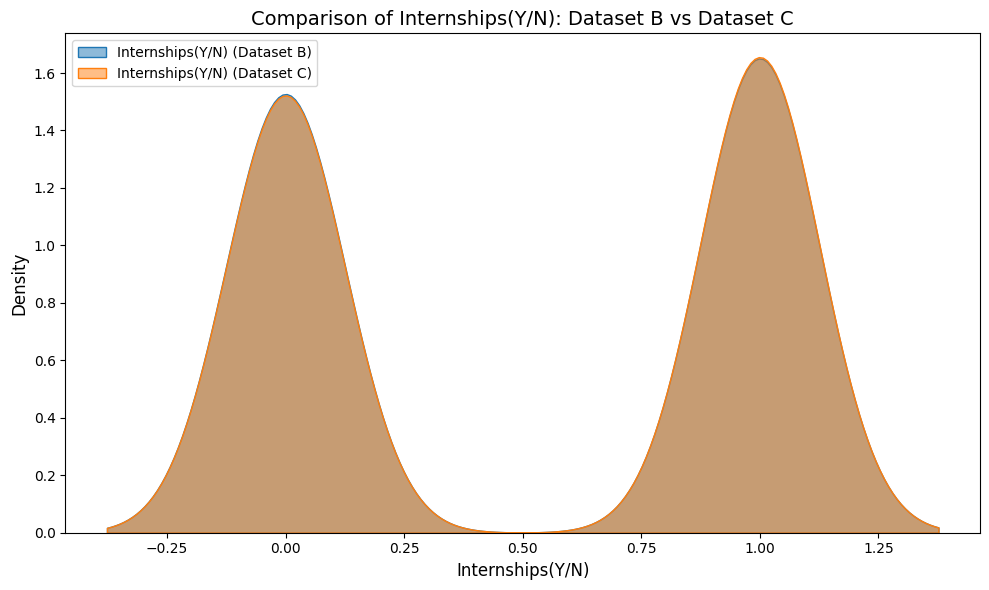

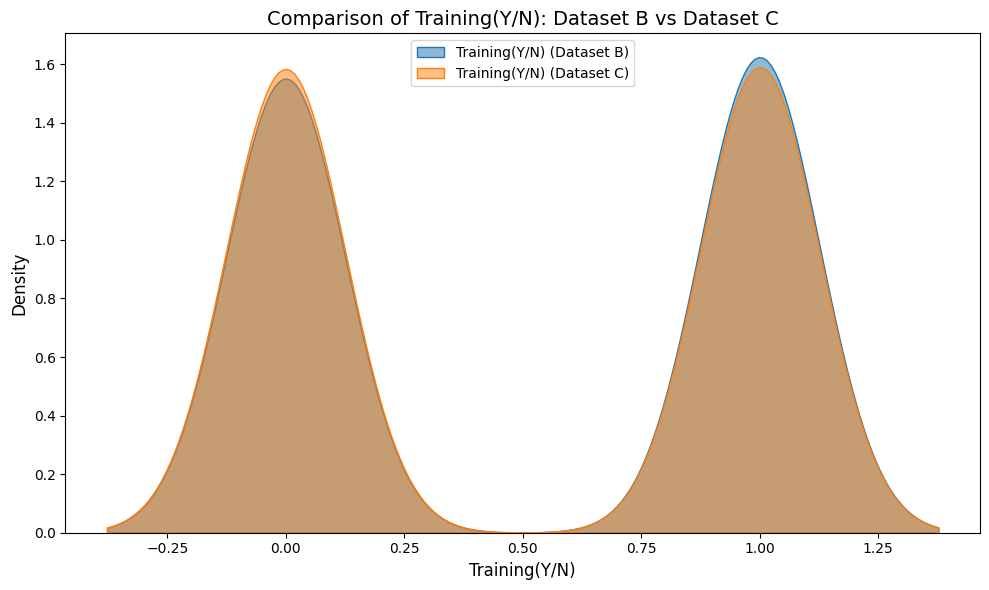

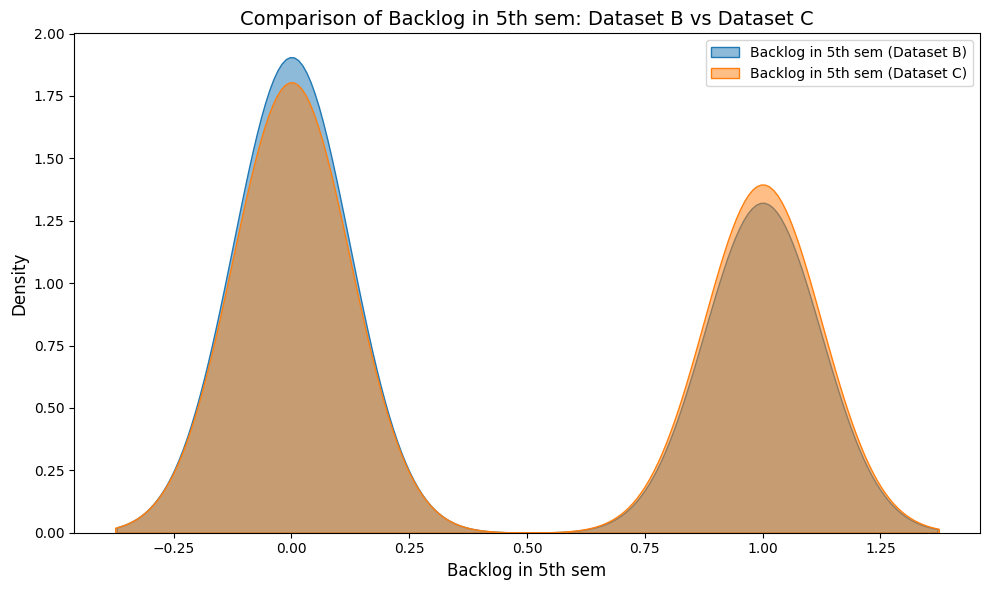

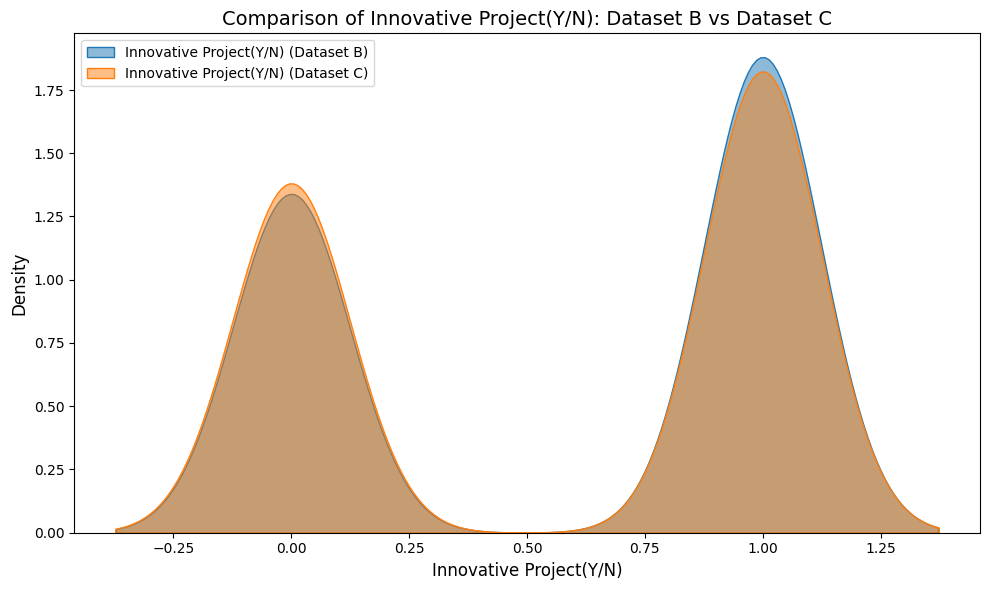

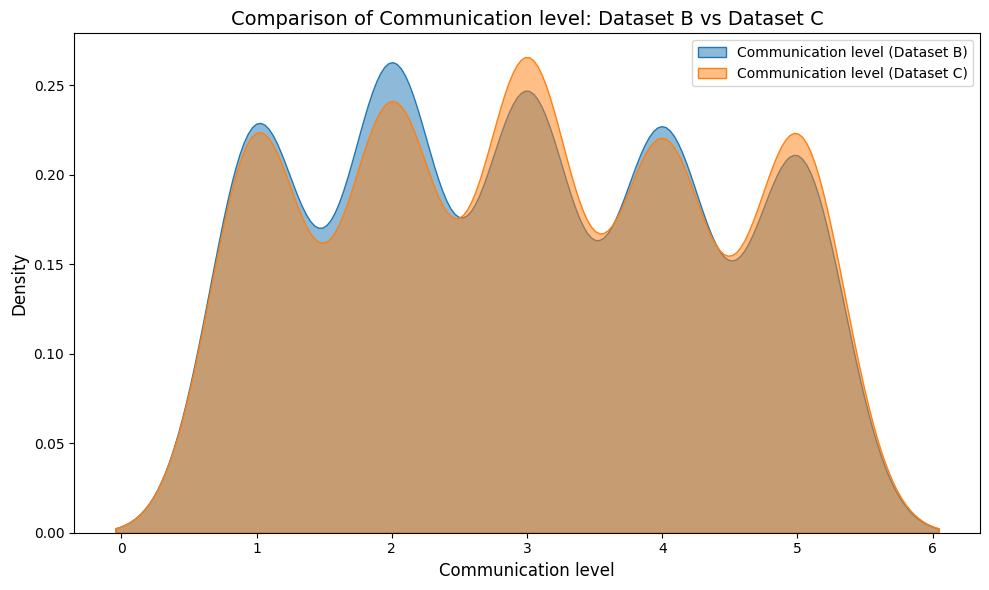

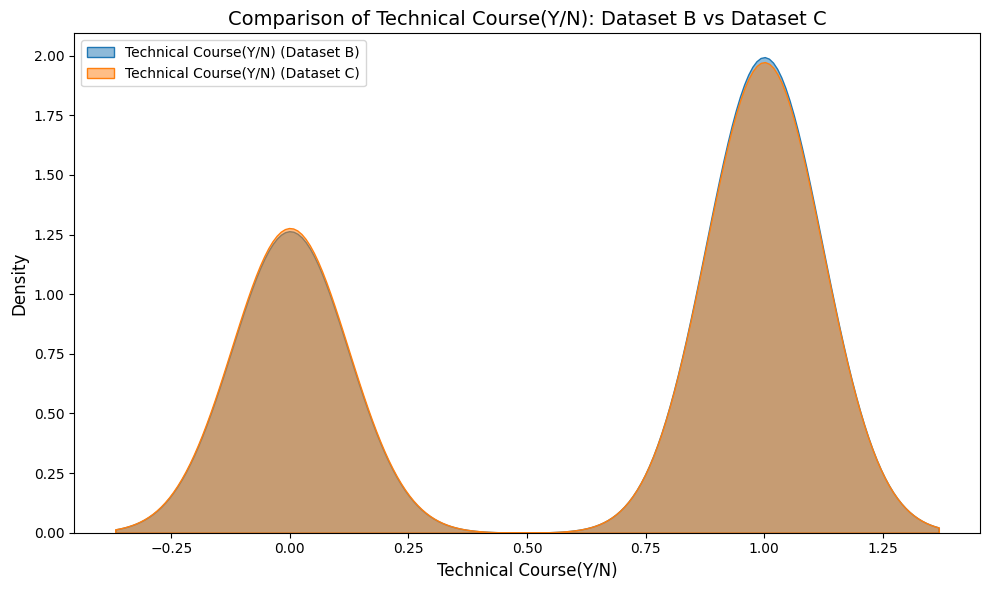

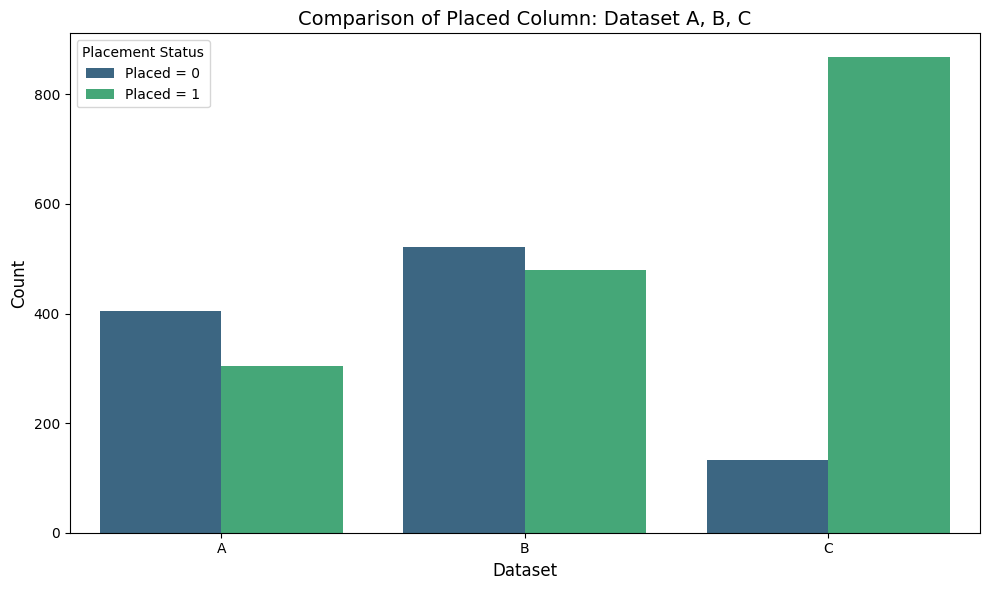

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_and_visualize(a_path, b_path, c_path):
    # Load the datasets
    a = pd.read_csv(a_path)
    b = pd.read_csv(b_path)
    c = pd.read_csv(c_path)

    # Identify common columns for comparison
    a_columns = [col for col in a.columns if col in c.columns and col != 'Placed']
    b_columns = [col for col in b.columns if col in c.columns and col != 'Placed']

    # Compare columns of a with c
    for col in a_columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(a[col], label=f'{col} (Dataset A)', fill=True, alpha=0.5)
        sns.kdeplot(c[col], label=f'{col} (Dataset C)', fill=True, alpha=0.5)

        # Add title and labels
        plt.title(f'Comparison of {col}: Dataset A vs Dataset C', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.tight_layout()

        # Show the graph
        plt.show()

    # Compare columns of b with c
    for col in b_columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(b[col], label=f'{col} (Dataset B)', fill=True, alpha=0.5)
        sns.kdeplot(c[col], label=f'{col} (Dataset C)', fill=True, alpha=0.5)

        # Add title and labels
        plt.title(f'Comparison of {col}: Dataset B vs Dataset C', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.tight_layout()

        # Show the graph
        plt.show()

    # Compare the 'Placed' column for datasets A, B, and C
    plt.figure(figsize=(10, 6))
    placed_counts = {
        'Dataset': ['A', 'B', 'C'],
        'Placed = 0': [a['Placed'].value_counts().get(0, 0), 
                       b['Placed'].value_counts().get(0, 0), 
                       c['Placed'].value_counts().get(0, 0)],
        'Placed = 1': [a['Placed'].value_counts().get(1, 0), 
                       b['Placed'].value_counts().get(1, 0), 
                       c['Placed'].value_counts().get(1, 0)]
    }

    # Convert to DataFrame
    placed_df = pd.DataFrame(placed_counts)

    # Melt for grouped bar plot
    placed_melted = placed_df.melt(id_vars='Dataset', var_name='Placement Status', value_name='Count')

    # Plot grouped bar chart
    sns.barplot(data=placed_melted, x='Dataset', y='Count', hue='Placement Status', palette='viridis')
    plt.title('Comparison of Placed Column: Dataset A, B, C', fontsize=14)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Placement Status')
    plt.tight_layout()

    # Show the graph
    plt.show()

# Example usage
if __name__ == "__main__":
    compare_and_visualize('a.csv', 'b.csv', 'combined_dataset.csv')
